In [5]:
from IPython.display import display, Markdown

from PIL import Image

from functions import (
    classify_image,
    textract_extract_text,
    anthropic_text_ocr,
    mistral_ocr,
    image_to_bytes,
    base64_to_image,
)

# Set image path for testing
IMAGE_PATH = "images/sample1-strike.png"

image = Image.open(IMAGE_PATH)

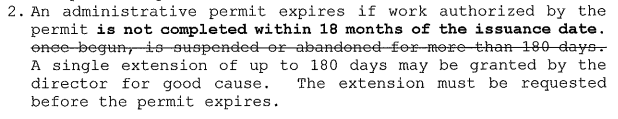

In [6]:
image
# image.resize((500, 500)).show()

In [7]:
classify_image(image)

2025-06-05 15:58:44 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


['instructions']

In [8]:
image_bytes = image_to_bytes(image)
text = textract_extract_text(image_bytes)

print(text)

2025-06-05 15:58:57 - INFO - Found credentials in shared credentials file: ~/.aws/credentials


2. . An administrative permit expires if work authorized by the
permit is not completed within 18 months of the issuance date.
once begun,
is
suspended
or
abandoned
for
more
than
180
days.
A single extension of up to 180 days may be granted by the
director for good cause. The extension must be requested
before the permit expires.


In [9]:
mistral_result = mistral_ocr(image)
display(Markdown(mistral_result.pages[0].markdown))

2025-06-05 16:00:11 - INFO - HTTP Request: POST https://api.mistral.ai/v1/ocr "HTTP/1.1 200 OK"


2. An administrative permit expires if work authorized by the permit is not completed within 18 months of the issuance date. once-begun, to suspended or abandoned-for-more-than-180-days. A single extension of up to 180 days may be granted by the director for good cause. The extension must be requested before the permit expires.

In [20]:
anthropic_result = anthropic_text_ocr(image)
print(anthropic_result)

2025-06-05 14:29:29 - INFO - HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"


2. An administrative permit expires if work authorized by the permit is not completed within 18 months of the issuance date. A single extension of up to 180 days may be granted by the director for good cause. The extension must be requested before the permit expires.


In [11]:
IMAGE_PATH = "images/ocr1.png"
image2 = Image.open(IMAGE_PATH)

In [13]:
# image2

In [15]:
mistral_response = mistral_ocr(image2, model="mistral-ocr-2503")

for image in mistral_response.pages[0].images:
    img = base64_to_image(image.image_base64)
    img.show()

2025-06-05 16:07:09 - INFO - HTTP Request: POST https://api.mistral.ai/v1/ocr "HTTP/1.1 200 OK"
